In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
import numpy as np
import time
import matplotlib.pyplot as plt

In [3]:
batch_size = 128
n_classes = 10
epochs =100

(raw_x_train, raw_y_train), (raw_x_test, raw_y_test) = mnist.load_data()

print('x_train: {}'.format(raw_x_train.shape))
print('y_train: {}'.format(raw_y_train.shape))
print('x_test: {}'.format(raw_x_test.shape))
print('y_test: {}'.format(raw_y_test.shape))

#データ数
m_train, m_test = raw_x_train.shape[0], raw_x_test.shape[0]

#ベクトル化
x_train = raw_x_train.astype('float32') / 255
x_test = raw_x_test.astype('float32') / 255

#yのOneHotVector化
y_train = keras.utils.to_categorical(raw_y_train, n_classes)
y_test = keras.utils.to_categorical(raw_y_test, n_classes)

11493376/11490434 [==============================] - 0s 0us/step
x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


label値= 3


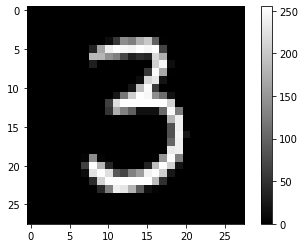

In [4]:
plt.imshow(raw_x_train[50], cmap='gray')
plt.colorbar()

print('label値=', raw_y_train[50])

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Activation, Flatten, BatchNormalization

start_time = time.time()

x_train = x_train.reshape(m_train, 28, 28, 1)
x_test = x_test.reshape(m_test, 28, 28, 1)

model = Sequential()
model.add(Conv2D(10, (3, 3), strides=(1, 1), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPool2D((3, 3)))

model.add(Conv2D(20, (3, 3), strides=(1, 1)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=3))
model.add(Flatten())

model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 10)        100       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 10)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 10)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 20)          1820      
_________________________________________________________________
activation_1 (Activation)    (None, 6, 6, 20)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 6, 6, 20)          80        
_________________________________________________________________
flatten (Flatten)            (None, 720)               0

In [7]:
history = model.fit(x_train, y_train,
                    batch_size = batch_size,
                    verbose = 1,
                    epochs = epochs,
                    validation_data = (x_test, y_test))

Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 0.2426 - accuracy: 0.9276 - val_loss: 0.1116 - val_accuracy: 0.9760
Epoch 2/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0680 - accuracy: 0.9799 - val_loss: 0.0513 - val_accuracy: 0.9829
Epoch 3/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0492 - accuracy: 0.9849 - val_loss: 0.0489 - val_accuracy: 0.9823
Epoch 4/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0383 - accuracy: 0.9889 - val_loss: 0.0409 - val_accuracy: 0.9864
Epoch 5/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0326 - accuracy: 0.9899 - val_loss: 0.0411 - val_accuracy: 0.9873
Epoch 6/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0270 - accuracy: 0.9916 - val_loss: 0.0345 - val_accuracy: 0.9888
Epoch 7/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0235 - accuracy: 0.9928 - val_loss: 0.0367 - val_accuracy: 0.9879

In [8]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Elapsed[s] :  204.55145025253296


Text(0, 0.5, 'accuracy')

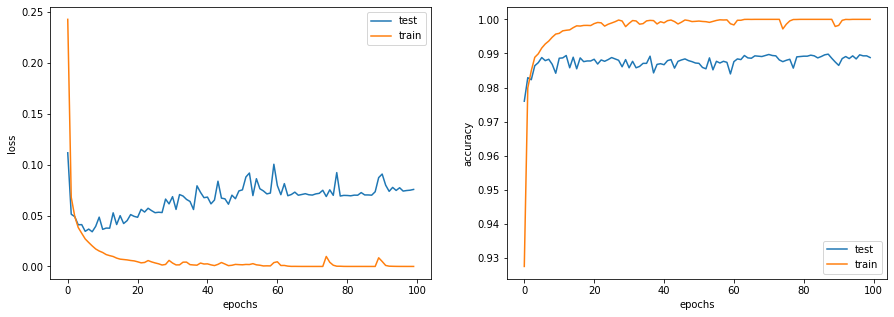

In [9]:
# 経過時間
print("Elapsed[s] : ", time.time() - start_time)

fig = plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(history.history['val_loss'], label='test')
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(history.history['val_accuracy'], label='test')
plt.plot(history.history['accuracy'], label='train')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')